## Siemens Descriptive Analysis

**Index**
1. Loading the datasets
2. Transposing the time series datasets
3. Merging time series datasets to add additional features
4. EDA on the whole time series
5. EDA on Additional Features
   - 5.1. Date Features
   - 5.2. String Features
   - 5.3. Categorical Features
   - 5.4. Numeric Features


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy
import matplotlib.pyplot as plt
import seaborn as sns
import skfda

## 1. Loading datasets

In [2]:
# import datasets
sensorA_System1 = pd.read_csv("System1_SensorA.csv")
sensorA_System2 = pd.read_csv("System2_SensorA.csv")
sensorB_System1 = pd.read_csv("System1_SensorB.csv")
sensorB_System2 = pd.read_csv("System2_SensorB.csv")
keyByTestID = pd.read_csv("Key by TestID.csv", parse_dates=['DateTime'])

In [3]:
keyByTestID .columns

Index(['TestID', 'FluidType', 'DateTime', 'Lot', 'CardNumber',
       'AgeOfCardInDaysAtTimeOfTest', 'ReaderSerialNumber', 'SampleDetectTime',
       'BubbleDetectTime', 'System', 'Sensor', 'AmbientTemperature',
       'Fluid Temperature', 'CardReturnCode', 'ReturnCode',
       'Results Error Code', 'Device Return Code', 'Bge Test ReturnCode'],
      dtype='object')

## 2. Transposing the time series datasets

In [4]:
# Transpose datasets to make columns as timestamps and rows as tests

# Sensor A
A1_transposed = sensorA_System1.T.reset_index()
A1_transposed.columns = A1_transposed.iloc[0]
A1_transposed.rename(columns={A1_transposed.columns[0]: 'TestID'}, inplace=True)
A1_transposed = A1_transposed.drop(0)
A1_transposed['TestID'] = A1_transposed['TestID'].astype(int)

A2_transposed = sensorA_System2.T.reset_index()
A2_transposed.columns = A2_transposed.iloc[0]
A2_transposed.rename(columns={A2_transposed.columns[0]: 'TestID'}, inplace=True)
A2_transposed = A2_transposed.drop(0)
A2_transposed['TestID'] = A2_transposed['TestID'].astype(int)

# Sensor B
B1_transposed = sensorB_System1.T.reset_index()
B1_transposed.columns = B1_transposed.iloc[0]
B1_transposed.rename(columns={B1_transposed.columns[0]: 'TestID'}, inplace=True)
B1_transposed = B1_transposed.drop(0)
B1_transposed['TestID'] = B1_transposed['TestID'].astype(int)

B2_transposed = sensorB_System2.T.reset_index()
B2_transposed.columns = B2_transposed.iloc[0]
B2_transposed.rename(columns={B2_transposed.columns[0]: 'TestID'}, inplace=True)
B2_transposed = B2_transposed.drop(0)
B2_transposed['TestID'] = B2_transposed['TestID'].astype(int)

## 3. Merging time series datasets to add additional features

In [5]:
# Merge dataset with keyByTestID to add additional features

# Sensor A

keyByTestID['TestID'] = keyByTestID['TestID'].astype(int)
keyByTestID['System'] = keyByTestID['System'].astype(str)

A1_keyByTestID = keyByTestID[(keyByTestID['Sensor'] == 'Sensor A') & (keyByTestID['System'] == 'System 1')]
A1_Merged = pd.merge(A1_keyByTestID,A1_transposed, how='inner', on=['TestID'])

A2_keyByTestID = keyByTestID.loc[(keyByTestID['Sensor'] == 'Sensor A') & (keyByTestID['System'] != 'System 1')]
A2_Merged = pd.merge(A2_keyByTestID,A2_transposed, how='inner', on=['TestID'])

# Sensor B

B1_keyByTestID = keyByTestID[(keyByTestID['Sensor'] == 'Sensor B') & (keyByTestID['System'] == 'System 1')]
B1_Merged = pd.merge(B1_keyByTestID,B1_transposed,how='inner', on=['TestID'])

B2_keyByTestID = keyByTestID.loc[(keyByTestID['Sensor'] == 'Sensor B') & (keyByTestID['System'] != 'System 1')]
B2_Merged = pd.merge(B2_keyByTestID,B2_transposed,how='inner', on=['TestID'])


### 4. EDA on the whole time series

In [6]:
# Function to extract basic statistcs from the whole time-series
def extract_time_domain_features(df):
    features = []
    for i, row in df.iterrows():
        values = row.values[1:]
        values = np.nan_to_num(values)  # Replace NaN with 0
        feature = {
            'Time': row['Time'],
            'mean': np.mean(values),
            'median': np.median(values),
            'std': np.std(values),
            'var': np.var(values),
            'skew': skew(values),
            'kurtosis': kurtosis(values),
            'entropy': entropy(np.histogram(values)[0]) # Measure of randomness in the dataset
        }
        features.append(feature)
    return pd.DataFrame(features)

Shape time-series

Shape System 1 - Sensor A:  (3524, 2677)
Shape System 1 - Sensor B:  (3515, 3359)
Shape System 2 - Sensor A:  (7781, 1302)
Shape System 2 - Sensor B:  (7780, 3350) 

Number of unique test run

System 1 - Sensor A:  3524
System 1 - Sensor B:  3515
System 2 - Sensor A:  7781
System 2 - Sensor B:  7780

Total test run

System 1 - Sensor A & B:
 7039

System 2 - Sensor A  & B:
 15561

Check for NA's values

System 1 - Sensor A:
 4758066

System 1 - Sensor B:
 7121978

System 2 - Sensor A:
 629083

System 2 - Sensor B:
 16348463

Number of unmatched tests

System 1 - Sensor A:
 117

System 1 - Sensor B:
 117

System 2 - Sensor A:
 0

System 2 - Sensor B:
 0

System 1 - Sensor A:
 
              Time         mean       median          std           var  \
count  2676.000000  2676.000000  2676.000000  2676.000000  2.676000e+03   
mean    267.700000   -10.815733    -9.845518    44.645454  1.570204e+04   
std     154.527797    44.016261    53.531170   117.106565  1.875119e+05

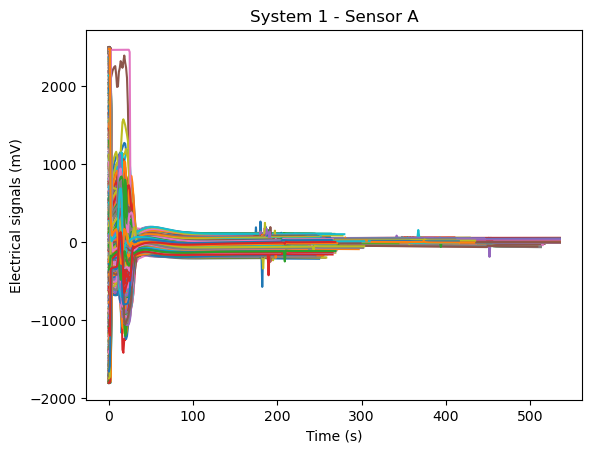

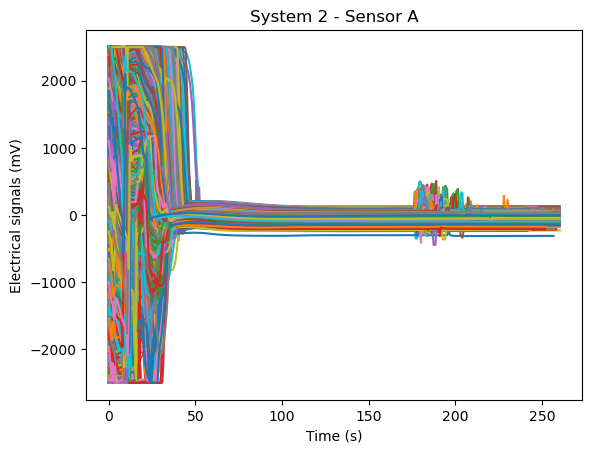

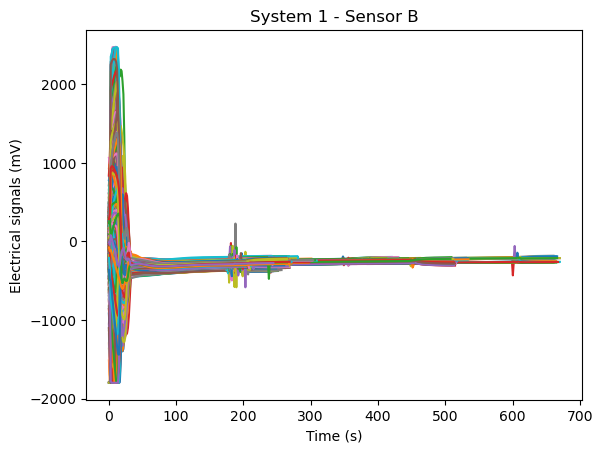

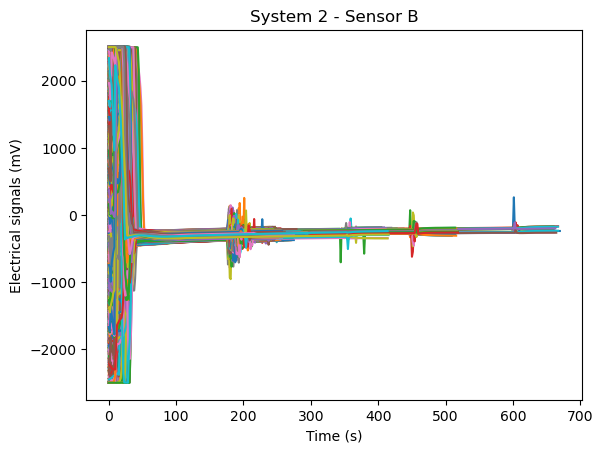

In [7]:
# Shape of the series
print("Shape time-series\n")
print("Shape System 1 - Sensor A: ", A1_transposed.shape)
print("Shape System 1 - Sensor B: ", B1_transposed.shape)
print("Shape System 2 - Sensor A: ", A2_transposed.shape)
print("Shape System 2 - Sensor B: ", B2_transposed.shape, "\n")

# Check for duplicates
print("Number of unique test run\n")
print("System 1 - Sensor A: ", A1_transposed["TestID"].nunique())
print("System 1 - Sensor B: ", B1_transposed["TestID"].nunique())
print("System 2 - Sensor A: ", A2_transposed["TestID"].nunique())
print("System 2 - Sensor B: ", B2_transposed["TestID"].nunique())

# Total number of test run 
print("\nTotal test run\n")
print("System 1 - Sensor A & B:\n", A1_transposed["TestID"].nunique() + B1_transposed["TestID"].nunique())
print("\nSystem 2 - Sensor A  & B:\n", A2_transposed["TestID"].nunique() + B2_transposed["TestID"].nunique())

# Check for missing values
print("\nCheck for NA's values\n")
print("System 1 - Sensor A:\n", np.sum(sensorA_System1.isna().sum()))
print("\nSystem 1 - Sensor B:\n", np.sum(sensorB_System1.isna().sum()))
print("\nSystem 2 - Sensor A:\n", np.sum(sensorA_System2.isna().sum()))
print("\nSystem 2 - Sensor B:\n", np.sum(sensorB_System2.isna().sum()))

# Unmatched test (time series versus key by id additional features)
A1_transposed_unmatched = A1_transposed[~A1_transposed['TestID'].isin(A1_Merged['TestID'])]
A2_transposed_unmatched = A2_transposed[~A2_transposed['TestID'].isin(A2_Merged['TestID'])]
B1_transposed_unmatched = B1_transposed[~B1_transposed['TestID'].isin(B1_Merged['TestID'])]
B2_transposed_unmatched = B2_transposed[~B2_transposed['TestID'].isin(B2_Merged['TestID'])]

print("\nNumber of unmatched tests\n")
print("System 1 - Sensor A:\n", A1_transposed_unmatched.shape[0])
print("\nSystem 1 - Sensor B:\n", B1_transposed_unmatched.shape[0])
print("\nSystem 2 - Sensor A:\n", A2_transposed_unmatched.shape[0])
print("\nSystem 2 - Sensor B:\n", B2_transposed_unmatched.shape[0])

# Statistical measurements on the time whole time series

system1A_features_df = extract_time_domain_features(sensorA_System1)
print("\nSystem 1 - Sensor A:\n ")
print(system1A_features_df.describe())
system1B_features_df = extract_time_domain_features(sensorB_System1)
print("System 1 - Sensor B:\n ")
print(system1B_features_df.describe())
system2A_features_df = extract_time_domain_features(sensorA_System2)
print("\nSystem 2 - Sensor A:\n ")
print(system2A_features_df.describe())
system2B_features_df = extract_time_domain_features(sensorB_System2)
print("\nSystem 2 - Sensor B:\n ")
print(system2B_features_df.describe())

# Visualization on the whole time series
A1_transposed_data = A1_transposed.iloc[:,1:]
grid_points_A1_transposed_data = A1_transposed_data.columns.astype(float) # generating the grid points with the original data
data_matrix_A1_transposed_data = A1_transposed_data
fd_A1_transposed_data = skfda.FDataGrid(
    data_matrix=data_matrix_A1_transposed_data,
    grid_points=grid_points_A1_transposed_data,
)

fd_A1_transposed_data.plot()
plt.title('System 1 - Sensor A')
plt.xlabel('Time (s)')
plt.ylabel('Electrical signals (mV)')
plt.show()

A2_transposed_data = A2_transposed.iloc[:,1:]
grid_points_A2_transposed_data = A2_transposed_data.columns.astype(float) # generating the grid points with the original data
data_matrix_A2_transposed_data = A2_transposed_data
fd_A2_transposed_data = skfda.FDataGrid(
    data_matrix=data_matrix_A2_transposed_data,
    grid_points=grid_points_A2_transposed_data,
)

fd_A2_transposed_data.plot()
plt.title('System 2 - Sensor A')
plt.xlabel('Time (s)')
plt.ylabel('Electrical signals (mV)')
plt.show()

B1_transposed_data = B1_transposed.iloc[:,1:]
grid_points_B1_transposed_data = B1_transposed_data.columns.astype(float) # generating the grid points with the original data
data_matrix_B1_transposed_data = B1_transposed_data
fd_B1_transposed_data = skfda.FDataGrid(
    data_matrix=data_matrix_B1_transposed_data,
    grid_points=grid_points_B1_transposed_data,
)

fd_B1_transposed_data.plot()
plt.title('System 1 - Sensor B')
plt.xlabel('Time (s)')
plt.ylabel('Electrical signals (mV)')
plt.show()

B2_transposed_data = B2_transposed.iloc[:,1:]
grid_points_B2_transposed_data = B2_transposed_data.columns.astype(float) # generating the grid points with the original data
data_matrix_B2_transposed_data = B2_transposed_data
fd_B2_transposed_data = skfda.FDataGrid(
    data_matrix=data_matrix_B2_transposed_data,
    grid_points=grid_points_B2_transposed_data,
)

fd_B2_transposed_data.plot()
plt.title('System 2 - Sensor B')
plt.xlabel('Time (s)')
plt.ylabel('Electrical signals (mV)')
plt.show()

In [ ]:
means = skfda.exploratory.stats.mean(fd_B2_transposed_data)

In [8]:
system1A_features_df.describe()

,Time,mean,median,std,var,skew,kurtosis,entropy
count,2676.000000,2676.000000,2676.000000,2676.000000,2.676000e+03,2676.000000,2676.000000,2676.000000
mean,267.700000,-10.815733,-9.845518,44.645454,1.570204e+04,1.426388,28.634271,0.987652
std,154.527797,44.016261,53.531170,117.106565,1.875119e+05,3.008617,44.090628,0.772993
min,0.200000,-202.325699,-205.250000,2.836029,8.043058e+00,-11.021422,-1.672792,0.051406
25%,133.950000,-22.196506,-18.729602,7.275631,5.293481e+01,-0.293366,0.178692,0.322848
50%,267.700000,0.093122,0.000000,10.789338,1.164155e+02,0.629673,23.661904,0.364979
75%,401.450000,0.814797,0.000000,54.014749,2.917593e+03,3.081316,34.417847,1.895951
max,535.200000,575.887569,813.780200,1781.083571,3.172259e+06,14.811743,464.790713,2.121405


In [9]:
system2A_features_df.describe()

,Time,mean,median,std,var,skew,kurtosis,entropy
count,1301.000000,1301.000000,1301.000000,1301.000000,1.301000e+03,1301.000000,1301.000000,1301.000000
mean,130.200000,100.058547,93.406328,190.178326,1.530801e+05,-0.054090,10.845307,1.533702
std,75.142132,350.193880,357.467363,342.055872,4.441717e+05,2.208714,35.844159,0.441262
min,0.200000,-435.179788,-619.726200,12.442093,1.548057e+02,-5.304560,-1.206260,0.219080
25%,65.200000,-9.047287,-5.784303,59.560024,3.547396e+03,-0.520653,0.386604,1.444278
50%,130.200000,-7.596667,-1.941592,61.519683,3.784671e+03,-0.397016,0.509265,1.727707
75%,195.200000,16.420898,8.714622,67.716878,4.585576e+03,-0.219302,0.719713,1.741824
max,260.200000,1538.395899,1614.130000,1555.304468,2.418972e+06,10.862235,235.948375,2.290827


In [10]:
system1B_features_df.describe()

,Time,mean,median,std,var,skew,kurtosis,entropy
count,3358.000000,3358.000000,3358.000000,3358.000000,3358.000000,3357.000000,3357.000000,3358.000000
mean,335.900000,-108.109520,-99.713605,62.649325,14039.594995,-4.116759,38.983030,0.586335
std,193.903086,139.715056,145.085418,100.586630,71788.316519,4.639966,103.028730,0.501485
min,0.200000,-408.621786,-412.173600,0.000000,0.000000,-41.887615,-1.903885,0.000000
25%,168.050000,-285.245874,-285.865250,27.639650,763.950257,-4.597791,4.780947,0.218169
50%,335.900000,-20.334075,0.000000,35.959968,1293.119405,-3.132248,8.028312,0.354345
75%,503.750000,-3.308104,0.000000,68.472509,4688.484579,-0.404616,19.395985,1.119829
max,671.600000,244.469341,255.512800,778.941400,606749.704465,3.081783,1752.596203,1.992385


In [11]:
system2B_features_df.describe()

,Time,mean,median,std,var,skew,kurtosis,entropy
count,3349.000000,3349.000000,3349.000000,3349.000000,3.349000e+03,3349.000000,3349.000000,3349.000000
mean,335.000000,-45.673415,-36.076003,83.127272,5.319086e+04,-8.011029,162.753228,0.651204
std,193.383471,332.115948,381.118769,215.161670,2.443343e+05,9.702103,430.568590,0.794641
min,0.200000,-325.572206,-321.481600,2.707385,7.329935e+00,-88.187301,-1.872966,0.001280
25%,167.600000,-294.776478,-293.501650,24.836990,6.168761e+02,-9.855138,0.406118,0.068245
50%,335.000000,-5.809296,0.000000,35.774267,1.279798e+03,-6.525207,41.089650,0.134576
75%,502.400000,-0.536763,0.000000,40.508040,1.640901e+03,-0.520778,133.760777,1.603988
max,669.800000,2079.879992,2481.814000,1459.676543,2.130656e+06,17.908710,7775.000129,2.218039


## 5. EDA on Additional Features

We can classify the additional information as following:

### Date

- **DateTime**: The date and time that the test was run.

### String

- **Lot**: Card lot. All cards built in one batch on one day. (These would have the same sensor print mixes – response should be very similar within a card lot)
  
### Categorical

- **System**: Identifies the system that ran the test (1=Current, 2A/2B=New). 
- **Sensor**: A or B.
- **FluidType**: The sample injected into the card. The calibration fluid is consistent across all conditions (e.g. should read similar values in mV for Sensor A across all conditions), the sample fluid can be either aqueous (Eurotrol L1, L3, L4, L5) or blood (the rest). The response reading in the sample window will vary depending on the sample.
- **Different codes**: CardReturnCode, ReturnCode, Results Error Code, Device Return Code, Bge Test ReturnCode. Determine whether or not the test was successful.

### Numerical

- **TestID**: Unique identifier of the test run created at the time of the test (there will be two rows for each testID – one for Sensor A and one for Sensor B).
- **CardNumber**: Number that identify the card that was used for running the test. There will be 2 rows with the same card number – one for Sensor A, one for Sensor B.
- **AgeofCardInDaysAtTimeOfTest**: Age of the card (in days) at the time of the test. Cards expire after 168 days.
- **ReaderSerialNumber**: Unique identifier of the reader that ran the card.
- **SampleDetectTime**: The time (in seconds) from the start of the test to when the sample fluid front is detected. 
- **BubbleDetectTime**: The time (in seconds) from the start of the test to when the bubble between calibration fluid and sample fluid is detected. 
- **AmbientTemperature**: If fluid temperature is blank, assume this is the temperature of the entire system (card, reader, host, and fluid).
- **Fluid Temperature** If specified, take as the temperature of the sample fluid. The rest of the system temperature can be taken as ambient temperature.

In [12]:
# Additional features from the time series datasets
A1_Merged_Features = A1_Merged.iloc[:,:18]
B1_Merged_Features = B1_Merged.iloc[:,:18]
A2_Merged_Features = A2_Merged.iloc[:,:18]
B2_Merged_Features = B2_Merged.iloc[:,:18]

In [13]:
# Shape - Additional Features
print("Shape - Additional Features\n")
print("Shape System 1 - Sensor A: ", A1_Merged_Features.shape)
print("Shape System 1 - Sensor B: ", B1_Merged_Features.shape)
print("Shape System 2 - Sensor A: ", A2_Merged_Features.shape)
print("Shape System 2 - Sensor B: ", B2_Merged_Features.shape, "\n")

# Concise summary of a DataFrame.
print("Information - Additional Features\n")
print("System 1 - Sensor A: ", A1_Merged_Features.info())
print("System 1 - Sensor B: ", B1_Merged_Features.info())
print("System 2 - Sensor A: ", A2_Merged_Features.info())
print("System 2 - Sensor B: ", B2_Merged_Features.info(), "\n")

# Check for missing values
print("\nCheck for NA's values\n")
print("System 1 - Sensor A:\n", A1_Merged_Features.isna().sum(),"\n")
print("\nSystem 1 - Sensor B:\n", B1_Merged_Features.isna().sum(),"\n")
print("\nSystem 2 - Sensor A:\n", A2_Merged_Features.isna().sum(),"\n")
print("\nSystem 2 - Sensor B:\n", B2_Merged_Features.isna().sum(),"\n")

Shape - Additional Features

Shape System 1 - Sensor A:  (3407, 18)
Shape System 1 - Sensor B:  (3398, 18)
Shape System 2 - Sensor A:  (7781, 18)
Shape System 2 - Sensor B:  (7780, 18) 

Information - Additional Features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 3406
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TestID                       3407 non-null   int64         
 1   FluidType                    3407 non-null   object        
 2   DateTime                     3407 non-null   datetime64[ns]
 3   Lot                          3407 non-null   object        
 4   CardNumber                   3407 non-null   int64         
 5   AgeOfCardInDaysAtTimeOfTest  3407 non-null   int64         
 6   ReaderSerialNumber           3407 non-null   int64         
 7   SampleDetectTime             3407 non-null   float64       
 8   BubbleDetectTime

### 5.1. Date Features

System 1 - Sensor A

Minimum date: 2023-10-31 10:37:54
Maximum date: 2024-04-09 19:53:30
Mean date: 2024-02-15 19:13:40.055474176
Median date: 2024-02-22 11:23:45
Mode date: 2023-10-31 10:54:52

Frequency of each date:
                    date  count
0    2024-03-04 16:16:23      2
1    2024-02-23 15:17:54      2
2    2024-02-23 15:00:28      2
3    2024-02-02 16:47:51      2
4    2024-02-23 15:05:03      2
...                  ...    ...
3355 2024-02-23 17:49:53      1
3356 2024-02-23 17:50:23      1
3357 2024-02-23 17:50:43      1
3358 2024-02-23 17:50:50      1
3359 2024-04-04 10:42:20      1

[3360 rows x 2 columns]


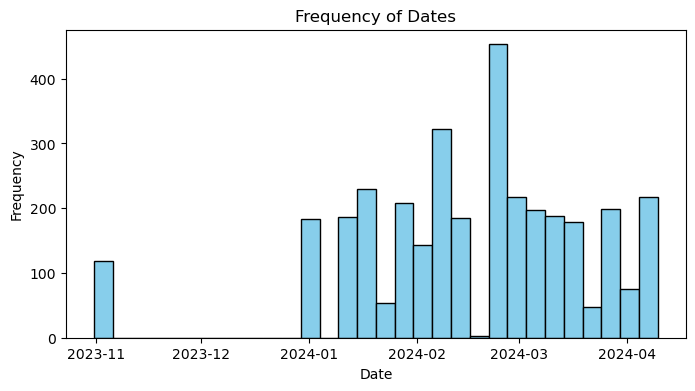


System 1 - Sensor B

Minimum date: 2023-10-31 10:37:54
Maximum date: 2024-04-09 19:53:30
Mean date: 2024-02-15 17:16:16.954679552
Median date: 2024-02-22 11:23:17.500000
Mode date: 2023-10-31 10:54:52

Frequency of each date:
                    date  count
0    2024-02-12 12:36:57      2
1    2024-02-14 07:51:42      2
2    2024-02-23 15:17:54      2
3    2023-10-31 10:56:19      2
4    2023-10-31 10:54:52      2
...                  ...    ...
3346 2024-02-23 17:48:58      1
3347 2024-02-23 17:49:19      1
3348 2024-02-23 17:49:22      1
3349 2024-02-23 17:49:53      1
3350 2024-04-04 10:42:20      1

[3351 rows x 2 columns]


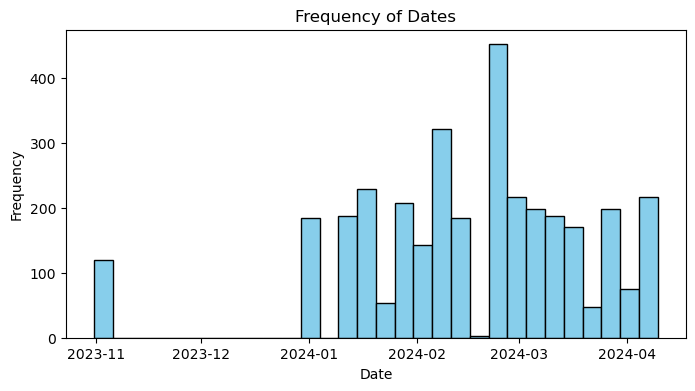


System 2 - Sensor A

Minimum date: 2023-09-19 10:13:55
Maximum date: 2024-04-23 11:34:15
Mean date: 2024-02-24 08:42:36.324636928
Median date: 2024-02-23 13:27:42
Mode date: 2024-01-03 11:41:59

Frequency of each date:
                    date  count
0    2024-01-17 11:58:58      2
1    2024-01-03 11:41:59      2
2    2024-04-16 14:44:58      2
3    2024-04-23 11:27:46      2
4    2024-04-22 14:48:50      2
...                  ...    ...
7744 2024-03-13 12:54:40      1
7745 2024-03-13 12:54:34      1
7746 2024-03-13 12:54:32      1
7747 2024-03-13 12:54:30      1
7748 2023-09-19 16:54:23      1

[7749 rows x 2 columns]


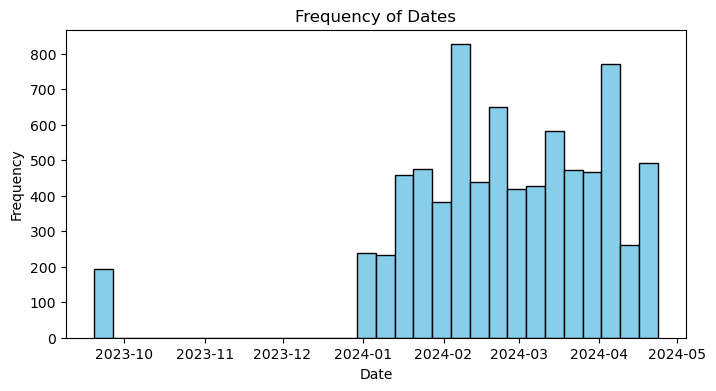


System 2 - Sensor A

Minimum date: 2023-09-19 10:13:55
Maximum date: 2024-04-23 11:34:15
Mean date: 2024-02-24 08:39:25.091902464
Median date: 2024-02-23 13:27:25
Mode date: 2024-01-03 11:41:59

Frequency of each date:
                    date  count
0    2024-03-11 15:19:14      2
1    2024-04-23 09:59:44      2
2    2024-04-23 11:27:46      2
3    2024-04-16 14:44:58      2
4    2024-04-22 14:48:50      2
...                  ...    ...
7743 2024-03-13 12:54:41      1
7744 2024-03-13 12:54:40      1
7745 2024-03-13 12:54:34      1
7746 2024-03-13 12:54:32      1
7747 2023-09-19 16:54:23      1

[7748 rows x 2 columns]


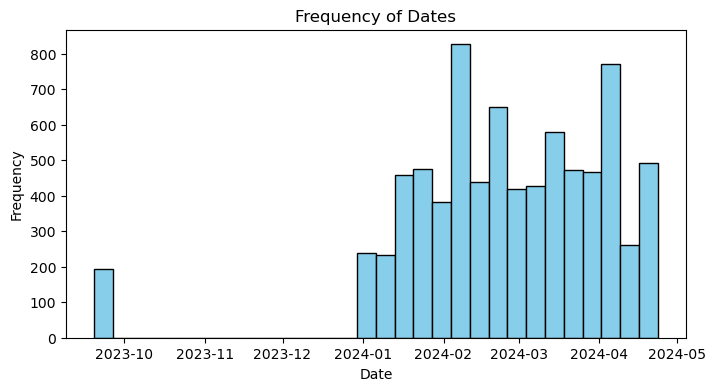

In [14]:
def analyze_dates(df):
    # Summary Statistics
    print("Minimum date:", df.min())
    print("Maximum date:", df.max())
    print("Mean date:", df.mean())
    print("Median date:", df.median())
    print("Mode date:", df.mode()[0])

    # Frequency Distribution
    date_counts = df.value_counts().reset_index()
    date_counts.columns = ['date', 'count']

    # Print frequency of each date
    print("\nFrequency of each date:")
    print(date_counts)

    # Plot histogram
    plt.figure(figsize=(8, 4))
    plt.hist(df, bins=30, color='skyblue', edgecolor='black')
    plt.title('Frequency of Dates')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.show()

A1_dates = A1_Merged_Features['DateTime']
B1_dates = B1_Merged_Features['DateTime']
A2_dates = A2_Merged_Features['DateTime']
B2_dates = B2_Merged_Features['DateTime']

print('System 1 - Sensor A\n')
analyze_dates(A1_dates)
print('\nSystem 1 - Sensor B\n')
analyze_dates(B1_dates)
print('\nSystem 2 - Sensor A\n')
analyze_dates(A2_dates)
print('\nSystem 2 - Sensor A\n')
analyze_dates(B2_dates)

### 5.2. String Features

In [15]:
import pandas as pd

def lot_value_counts_table(A, B):
    # Calculate value counts for each dataframe
    A_counts = A['Lot'].value_counts().reset_index()
    A_counts.columns = ['Lot', 'A_Count']

    B_counts = B['Lot'].value_counts().reset_index()
    B_counts.columns = ['Lot', 'B_Count']

    # Merge counts into one dataframe
    merged_counts = pd.merge(A_counts, B_counts, on='Lot', how='outer')

    # Fill NaN values with 0
    merged_counts = merged_counts.fillna(0)

    return merged_counts

lot_system1 = lot_value_counts_table(A1_Merged_Features, B1_Merged_Features)
lot_system2 = lot_value_counts_table(A2_Merged_Features, B2_Merged_Features)
print("Lot System1\n")
print(lot_system1)
print("\nLot System2\n")
print(lot_system2)

Lot System1

            Lot  A_Count  B_Count
0   07-24023-00      237      236
1   07-24030-00      205      205
2   07-23333-00      203      203
3   07-24094-00      115      115
4   07-23284-00       95       95
5   07-23341-00       95       95
6   07-23221-00       92       92
7   07-24017-00       92       92
8   07-23277-00       91       91
9   07-23312-00       89       89
10  07-24010-00       88       88
11  07-23305-00       88       88
12  07-23258-00       86       86
13  07-23256-00       82       82
14  07-23228-00       82       82
15  07-24052-00       80       80
16  07-23200-00       72       72
17  07-23298-00       70       70
18  07-23347-00       70       70
19  07-23235-00       67       67
20  07-24045-00       67       67
21  07-23193-00       65       65
22  07-23292-00       65       65
23  07-23263-00       65       65
24  07-23242-00       64       57
25  07-23186-00       64       64
26  07-23327-00       64       64
27  07-24038-00       60       60
2

### 5.3. Categorical Features

System:
           A1_System  B1_System  A2_System  B2_System
System 1      3407.0     3398.0        NaN        NaN
System 2A        NaN        NaN     5365.0     5365.0
System 2B        NaN        NaN     2416.0     2415.0

Sensor:
          A1_Sensor  B1_Sensor  A2_Sensor  B2_Sensor
Sensor A     3407.0        NaN     7781.0        NaN
Sensor B        NaN     3398.0        NaN     7780.0

Fluid Type:
             A1_FluidType  B1_FluidType  A2_FluidType  B2_FluidType
AB                    232           232           728           728
DB                    117           117           210           210
Eurotrol L1           617           617          1495          1494
Eurotrol L3           602           602          1629          1629
Eurotrol L4           317           312           525           525
Eurotrol L5           423           423          1263          1263
HNB                   189           189           402           402
NB                    594           593          10

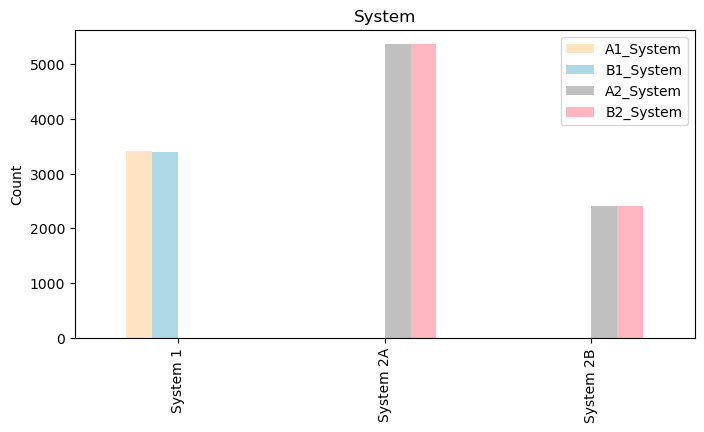

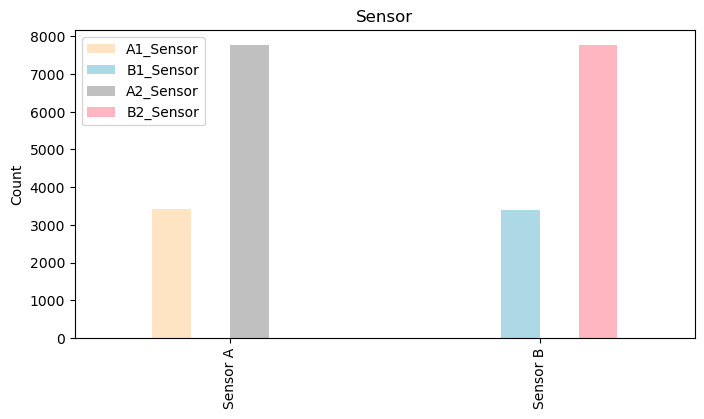

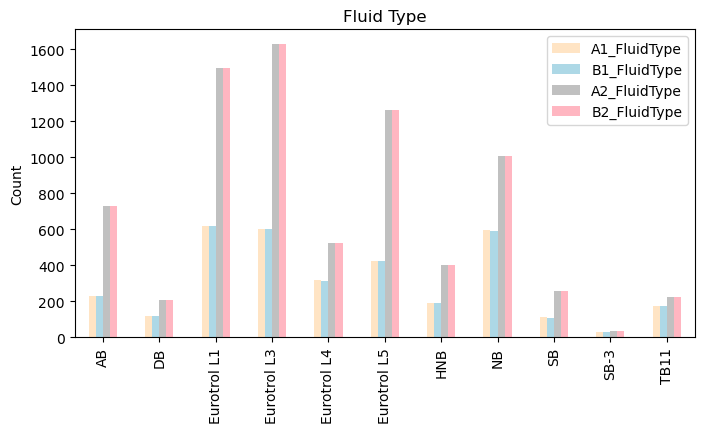

In [16]:
# System
data_system = {'A1_System': A1_Merged_Features['System'].value_counts(),
               'B1_System': B1_Merged_Features['System'].value_counts(),
               'A2_System': A2_Merged_Features['System'].value_counts(),
               'B2_System': B2_Merged_Features['System'].value_counts()}

df_system = pd.DataFrame(data_system)

# Sensor
data_sensor = {'A1_Sensor': A1_Merged_Features['Sensor'].value_counts(),
               'B1_Sensor': B1_Merged_Features['Sensor'].value_counts(),
               'A2_Sensor': A2_Merged_Features['Sensor'].value_counts(),
               'B2_Sensor': B2_Merged_Features['Sensor'].value_counts()}

df_sensor = pd.DataFrame(data_sensor)

# Fluid Type
data_fluidType = {'A1_FluidType': A1_Merged_Features['FluidType'].value_counts(),
                  'B1_FluidType': B1_Merged_Features['FluidType'].value_counts(),
                  'A2_FluidType': A2_Merged_Features['FluidType'].value_counts(),
                  'B2_FluidType': B2_Merged_Features['FluidType'].value_counts()}

df_fluidType = pd.DataFrame(data_fluidType)

# CardReturnCode
data_CardReturnCode = {'A1_CardReturnCode': A1_Merged_Features['CardReturnCode'].value_counts(),
                       'B1_CardReturnCode': B1_Merged_Features['CardReturnCode'].value_counts(),
                       'A2_CardReturnCode': A2_Merged_Features['CardReturnCode'].value_counts(),
                       'B2_CardReturnCode': B2_Merged_Features['CardReturnCode'].value_counts()}

df_CardReturnCode = pd.DataFrame(data_CardReturnCode)

# ReturnCode
data_ReturnCode = {'A1_ReturnCode': A1_Merged_Features['ReturnCode'].value_counts(),
                   'B1_ReturnCode': B1_Merged_Features['ReturnCode'].value_counts(),
                   'A2_ReturnCode': A2_Merged_Features['ReturnCode'].value_counts(),
                   'B2_ReturnCode': B2_Merged_Features['ReturnCode'].value_counts()}

df_ReturnCode = pd.DataFrame(data_ReturnCode)

# Results Error Code
data_ErrorCode = {'A1_ErrorCode': A1_Merged_Features['Results Error Code'].value_counts(),
                  'B1_ErrorCode': B1_Merged_Features['Results Error Code'].value_counts(),
                  'A2_ErrorCode': A2_Merged_Features['Results Error Code'].value_counts(),
                  'B2_ErrorCode': B2_Merged_Features['Results Error Code'].value_counts()}

df_ErrorCode = pd.DataFrame(data_ErrorCode)

# Device Return Code
data_DeviceReturnCode = {'A1_DeviceReturnCode': A1_Merged_Features['Device Return Code'].value_counts(),
                         'B1_DeviceReturnCode': B1_Merged_Features['Device Return Code'].value_counts(),
                         'A2_DeviceReturnCode': A2_Merged_Features['Device Return Code'].value_counts(),
                         'B2_DeviceReturnCode': B2_Merged_Features['Device Return Code'].value_counts()}

df_DeviceReturnCode = pd.DataFrame(data_DeviceReturnCode)

# Print the data frames
print("System:")
print(df_system)
print("\nSensor:")
print(df_sensor)
print("\nFluid Type:")
print(df_fluidType)
print("\nCard Return Code:")
print(df_CardReturnCode)
print("\nReturn Code:")
print(df_ReturnCode)
print("\nDevice Return Code:")
print(df_DeviceReturnCode)
print("\nBge Test ReturnCode:")
print("A1: ", A1_Merged_Features['Bge Test ReturnCode'].value_counts())
print("B1: ", B1_Merged_Features['Bge Test ReturnCode'].value_counts())
print("A2: ", A2_Merged_Features['Bge Test ReturnCode'].value_counts())
print("B2: ", B2_Merged_Features['Bge Test ReturnCode'].value_counts())

# Plotting
colors_input = ['bisque', 'lightblue', 'silver', 'lightpink']
df_system.plot(kind='bar', figsize=(8, 4), color=colors_input)
plt.title('System')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

df_sensor.plot(kind='bar', figsize=(8, 4), color=colors_input)
plt.title('Sensor')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

df_fluidType.plot(kind='bar', figsize=(8, 4), color=colors_input)
plt.title('Fluid Type')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

### 5.4. Numeric Features

In [17]:
# Function to calculate mean and median and return as a data frame
def calculate_stats(features_system1A, features_system1B, features_system2A, features_system2B, variable):
    # Statistical measurements
    mean_value_system1A = features_system1A.describe().loc['mean', variable]
    mean_value_system1B = features_system1B.describe().loc['mean', variable]
    mean_value_system2A = features_system2A.describe().loc['mean', variable]
    mean_value_system2B = features_system2B.describe().loc['mean', variable]

    median_value_system1A = features_system1A[variable].median()
    median_value_system1B = features_system1B[variable].median()
    median_value_system2A = features_system2A[variable].median()
    median_value_system2B = features_system2B[variable].median()

    # Display the information
    data = {
        "System": ["System 1A", "System 1B", "System 2A", "System 2B"],
        "Mean": [
            mean_value_system1A,
            mean_value_system1B,
            mean_value_system2A,
            mean_value_system2B,
        ],
        "Median": [
            median_value_system1A,
            median_value_system1B,
            median_value_system2A,
            median_value_system2B,
        ],
    }

    df = pd.DataFrame(data)
    return df


# Functions to plot different boxplot and histograms together
def box_plot_time(variable, data1, data2, data3, data4, title_input, colors_input, xlabel_input, labels_input):
    plt.figure(figsize=(10,3))
    bp = plt.boxplot([data1[variable], data2[variable], data3[variable], data4[variable]], 
                     labels=labels_input,
                     patch_artist=True,
                     boxprops=dict(facecolor="skyblue"))
    colors = colors_input
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title(title_input)
    plt.xlabel('')
    plt.ylabel(xlabel_input)
    plt.show()

def histogram_time(variable, data1, data2, data3, data4, title_input, colors_input, xlabel_input, labels_input):
    fig, axes = plt.subplots(2, 2, figsize=(10,5))

    sns.histplot(data=data1[variable], color=colors_input[0], label=labels_input[0], kde=True, ax=axes[0, 0])
    sns.histplot(data=data2[variable], color=colors_input[1], label=labels_input[1], kde=True, ax=axes[0, 1])
    sns.histplot(data=data3[variable], color=colors_input[2], label=labels_input[2], kde=True, ax=axes[1, 0])
    sns.histplot(data=data4[variable], color=colors_input[3], label=labels_input[3], kde=True, ax=axes[1, 1])
    
    axes[0, 0].set_title(title_input)
    axes[0, 0].set_xlabel(xlabel_input)
    axes[0, 1].set_xlabel(xlabel_input)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 1].legend()
    axes[1, 0].set_title(title_input)
    axes[1, 0].set_xlabel(xlabel_input)
    axes[1, 1].set_xlabel(xlabel_input)
    axes[0, 1].set_ylabel('Frequency')
    axes[1, 0].legend()
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()


# Parameters

colors_input = ['bisque', 'lightblue', 'silver', 'lightpink']

variable1 = "AgeOfCardInDaysAtTimeOfTest"
variable2 = "SampleDetectTime"
variable3 = "BubbleDetectTime"
variable4 = "AmbientTemperature"

xlabel_input1 = "Age (in days)"
xlabel_input2 = "Time (in seconds)"
xlabel_input3 = "Temperature (in degree Celsius)"

title_input1 = 'Card Age of the tests run for two systems'
title_input2 = "Aqueous Fluid"
title_input3 = "Blood Fluid"
title_input4 = 'Sample detect time of the tests run for two systems'
title_input5 = 'Bubble detect time for two systems'
title_input6 = 'Ambient Temperature'

labels_input1 = ['System 1 - Sensor A', 'System 1 - Sensor B', 'System 2 - Sensor A', 'System 2 - Sensor B']
labels_input2 = ['System 1A - Aqueous', 'System 1B - Aqueous', 'System 2A - Aqueous', 'System 2B - Aqueous']
labels_input3 = ['System 1A - Blood', 'System 1B - Blood', 'System 2A - Blood', 'System 2B - Blood']


In [18]:
# Summary for numeric variables
A1_Merged_Features.describe()

,TestID,CardNumber,AgeOfCardInDaysAtTimeOfTest,ReaderSerialNumber,SampleDetectTime,BubbleDetectTime,AmbientTemperature,Fluid Temperature
count,3.407000e+03,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,119.000000
mean,1.249138e+07,16431.470502,102.668330,5127.261814,202.464573,201.427062,22.001116,22.268908
std,9.216216e+04,80969.890564,77.790648,4257.517574,61.917638,61.941894,1.204894,6.139201
min,1.219091e+07,0.000000,5.000000,229.000000,0.000000,0.000000,16.353800,15.000000
25%,1.243761e+07,360.000000,31.000000,2346.000000,182.800000,181.800000,21.447900,15.000000
50%,1.251184e+07,641.000000,92.000000,5320.000000,186.000000,185.000000,21.902700,22.000000
75%,1.255613e+07,6229.500000,173.000000,6750.000000,191.600000,190.600000,22.342400,30.000000
max,1.263584e+07,611011.000000,240.000000,36880.000000,611.600000,610.600000,30.024100,30.000000


In [19]:
B1_Merged_Features.describe()

,TestID,CardNumber,AgeOfCardInDaysAtTimeOfTest,ReaderSerialNumber,SampleDetectTime,BubbleDetectTime,AmbientTemperature,Fluid Temperature
count,3.398000e+03,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,119.000000
mean,1.249117e+07,16472.520895,102.434667,5126.157446,202.456739,201.419659,22.003559,22.268908
std,9.218103e+04,81073.084991,77.728309,4261.529933,61.997529,62.021827,1.205254,6.139201
min,1.219091e+07,0.000000,5.000000,229.000000,0.000000,0.000000,16.353800,15.000000
25%,1.243760e+07,361.250000,31.000000,2346.000000,182.800000,181.800000,21.449650,15.000000
50%,1.251183e+07,644.500000,92.000000,5320.000000,186.000000,185.000000,21.902700,22.000000
75%,1.255601e+07,6230.000000,173.000000,6750.000000,191.600000,190.600000,22.342400,30.000000
max,1.263584e+07,611011.000000,240.000000,36880.000000,611.600000,610.600000,30.024100,30.000000


In [20]:
A2_Merged_Features.describe()

,TestID,CardNumber,AgeOfCardInDaysAtTimeOfTest,ReaderSerialNumber,SampleDetectTime,BubbleDetectTime,AmbientTemperature,Fluid Temperature
count,7.781000e+03,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,194.000000
mean,3.556559e+06,301426.436705,82.502121,59.837553,189.729521,187.720859,23.963248,22.278351
std,1.044143e+04,46663.894528,78.535883,30.412787,37.649802,37.649320,1.865988,6.343766
min,3.518393e+06,200217.000000,5.000000,20.000000,177.200000,175.600000,10.125700,15.000000
25%,3.550149e+06,301367.000000,7.000000,33.000000,180.000000,178.000000,23.040400,15.000000
50%,3.556433e+06,302653.000000,68.000000,48.000000,182.000000,179.600000,24.158500,22.000000
75%,3.565205e+06,303727.000000,146.000000,87.000000,186.200000,184.200000,24.985600,30.000000
max,3.572434e+06,504200.000000,240.000000,127.000000,610.000000,608.400000,31.851400,30.000000


In [21]:
B2_Merged_Features.describe()

,TestID,CardNumber,AgeOfCardInDaysAtTimeOfTest,ReaderSerialNumber,SampleDetectTime,BubbleDetectTime,AmbientTemperature,Fluid Temperature
count,7.780000e+03,7780.000000,7780.000000,7780.000000,7780.000000,7780.000000,7780.000000,194.000000
mean,3.556559e+06,301413.514524,82.500386,59.832776,189.731028,187.722288,23.962490,22.278351
std,1.044195e+04,46652.968989,78.540782,30.411823,37.651987,37.651529,1.864909,6.343766
min,3.518393e+06,200217.000000,5.000000,20.000000,177.200000,175.600000,10.125700,15.000000
25%,3.550149e+06,301366.750000,7.000000,33.000000,180.000000,178.000000,23.040125,15.000000
50%,3.556432e+06,302653.000000,68.000000,48.000000,182.000000,179.600000,24.158450,22.000000
75%,3.565205e+06,303727.000000,146.000000,87.000000,186.200000,184.200000,24.985450,30.000000
max,3.572434e+06,504200.000000,240.000000,127.000000,610.000000,608.400000,31.851400,30.000000


#### TestID

In [22]:
# Check for duplicates
duplicated_test_ids_A1_Merged_Features = A1_Merged_Features['TestID'].duplicated().any()
duplicated_test_ids_B1_Merged_Features = B1_Merged_Features['TestID'].duplicated().any()
duplicated_test_ids_A2_Merged_Features = A2_Merged_Features['TestID'].duplicated().any()
duplicated_test_ids_B2_Merged_Features = B2_Merged_Features['TestID'].duplicated().any()
print("There are duplicates in A1: ", duplicated_test_ids_A1_Merged_Features)
print("There are duplicates in B1: ", duplicated_test_ids_B1_Merged_Features)
print("There are duplicates in A2: ", duplicated_test_ids_A2_Merged_Features)
print("There are duplicates in B2: ", duplicated_test_ids_B2_Merged_Features)

There are duplicates in A1:  False
There are duplicates in B1:  False
There are duplicates in A2:  False
There are duplicates in B2:  False


#### Card Number

In [23]:
duplicated_CardNumber_A1_Merged_Features = A1_Merged_Features['CardNumber'].duplicated().any()
duplicated_CardNumber_B1_Merged_Features = B1_Merged_Features['CardNumber'].duplicated().any()
duplicated_CardNumber_A2_Merged_Features = A2_Merged_Features['CardNumber'].duplicated().any()
duplicated_CardNumber_B2_Merged_Features = B2_Merged_Features['CardNumber'].duplicated().any()
print("There are duplicates in A1: ", duplicated_CardNumber_A1_Merged_Features)
print("There are duplicates in B1: ", duplicated_CardNumber_B1_Merged_Features)
print("There are duplicates in A2: ", duplicated_CardNumber_A2_Merged_Features)
print("There are duplicates in B2: ", duplicated_CardNumber_B2_Merged_Features)

# Show test IDs and Card Number with counts greater than 1
duplicated_test_ids = A1_Merged_Features[['TestID', 'CardNumber']].value_counts()
duplicated_test_ids = duplicated_test_ids[duplicated_test_ids > 1]

print("\nTest IDs with counts greater than 1:")
print(duplicated_test_ids)

There are duplicates in A1:  True
There are duplicates in B1:  True
There are duplicates in A2:  True
There are duplicates in B2:  True

Test IDs with counts greater than 1:
Series([], dtype: int64)


#### Age of the card (in days)

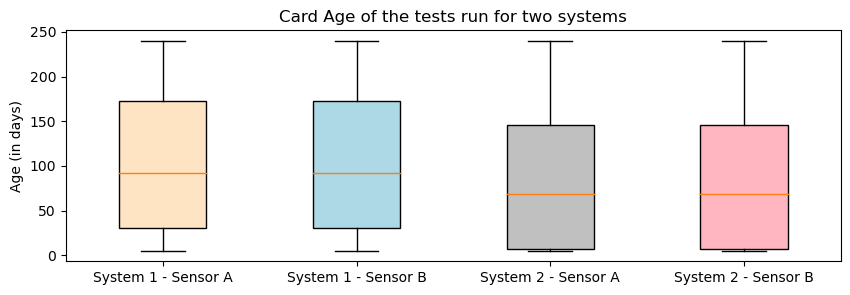

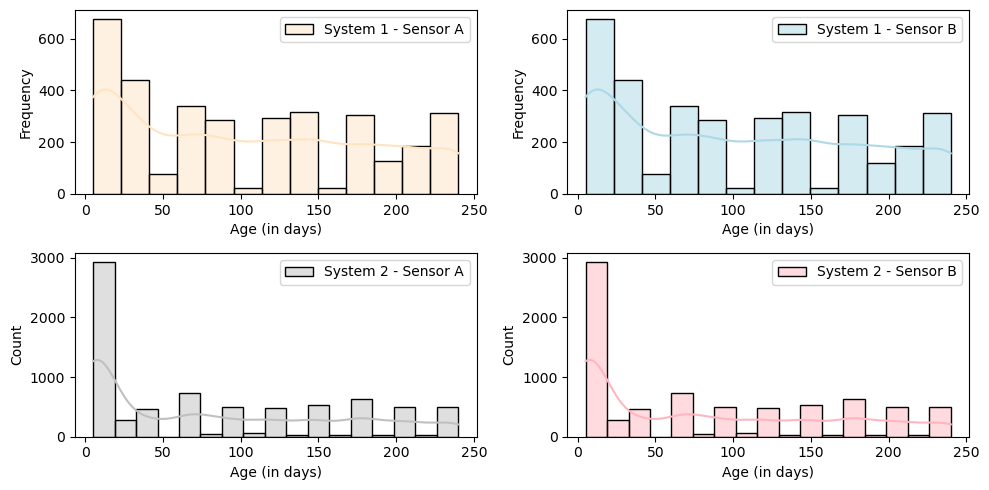

,System,Mean,Median
0,System 1A,102.668330,92.0
1,System 1B,102.434667,92.0
2,System 2A,82.502121,68.0
3,System 2B,82.500386,68.0


In [24]:
# Boxplots
boxplot_ageCard = box_plot_time(variable1, A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features,
                                title_input1, colors_input, xlabel_input1, labels_input1)
boxplot_ageCard

# Histograms
histogram_ageCard = histogram_time(variable1, 
                                   A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features,
                                   "", colors_input, xlabel_input1, labels_input1)
histogram_ageCard

# Mean and Median
calculate_stats(A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features, variable1)

#### Sample detect time (in seconds)

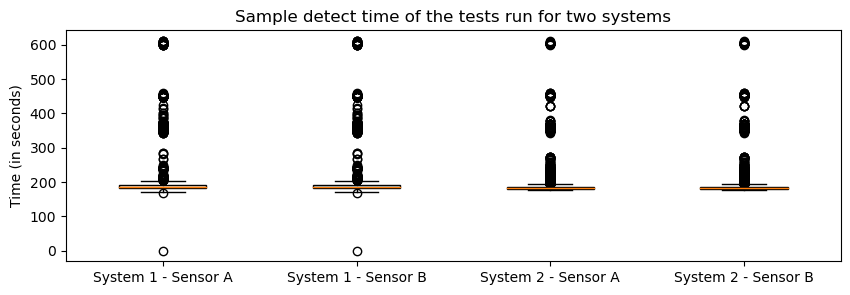

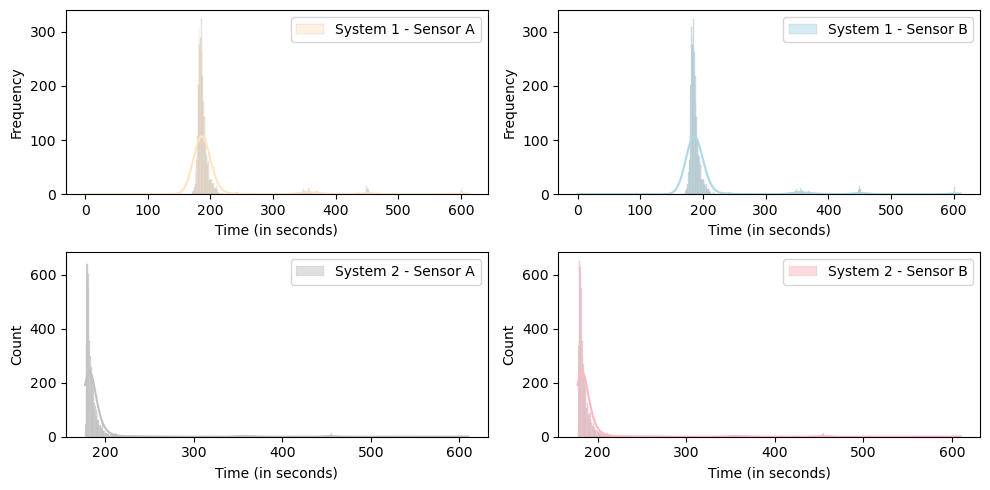

,System,Mean,Median
0,System 1A,202.464573,186.0
1,System 1B,202.456739,186.0
2,System 2A,189.729521,182.0
3,System 2B,189.731028,182.0


In [25]:
# Boxplots
boxplot_sampledetect = box_plot_time(variable2, 
                                     A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features,
                                     title_input4, colors_input, xlabel_input2, labels_input1)
boxplot_sampledetect 

# Histograms
histogram_sampledetect = histogram_time(variable2, 
                                        A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features,
                                        "", colors_input, xlabel_input2, labels_input1)
histogram_sampledetect

# Mean and Median
calculate_stats(A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features, variable2)

#### Bubble Detect Time (in seconds)

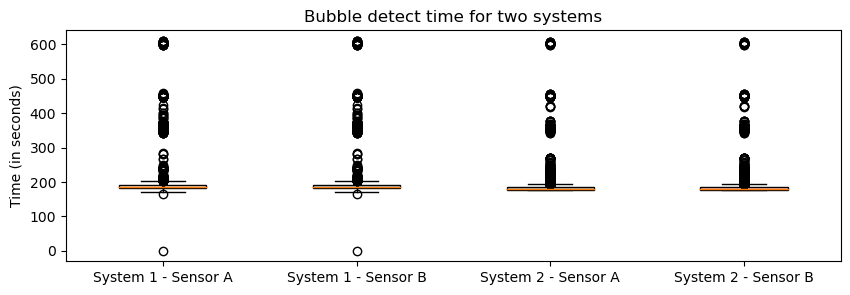

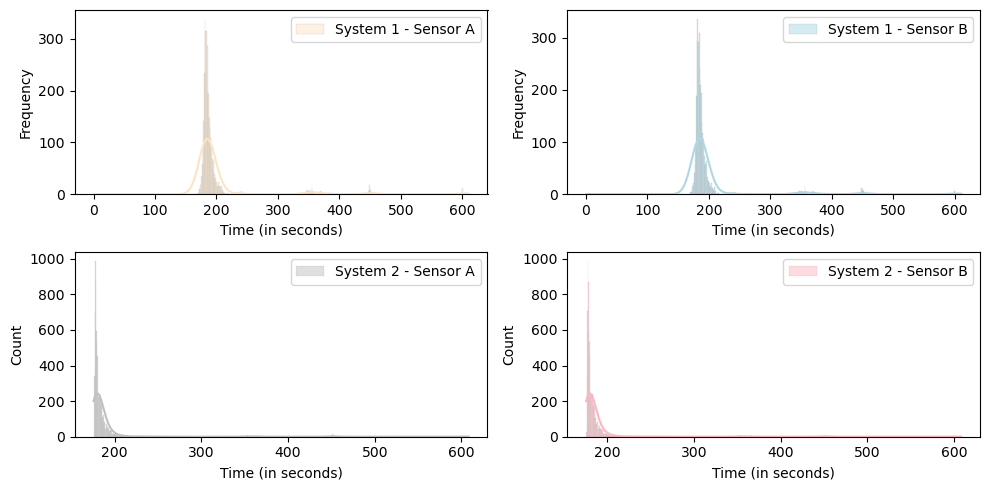

,System,Mean,Median
0,System 1A,201.427062,185.0
1,System 1B,201.419659,185.0
2,System 2A,187.720859,179.6
3,System 2B,187.722288,179.6


In [26]:
# Boxplots
boxplot_bubbletime = box_plot_time(variable3, 
                                   A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features,
                                   title_input5, colors_input, xlabel_input2, labels_input1)
boxplot_bubbletime

# Histograms
histogram_bubbletime = histogram_time(variable3, 
                                      A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features,
                                      "", colors_input, xlabel_input2, labels_input1)
histogram_bubbletime

# Mean and Median
calculate_stats(A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features, variable3)

#### Ambient temperature (in degree Celsius)

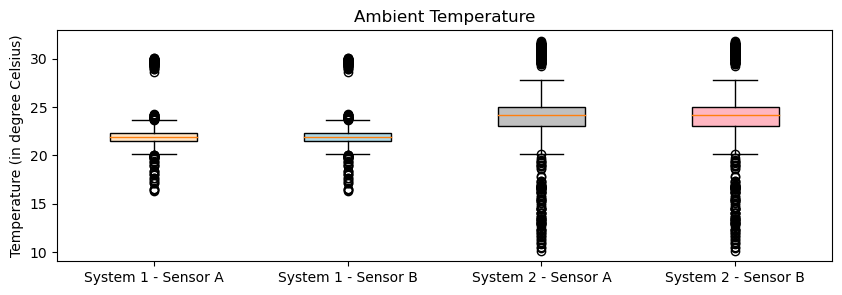

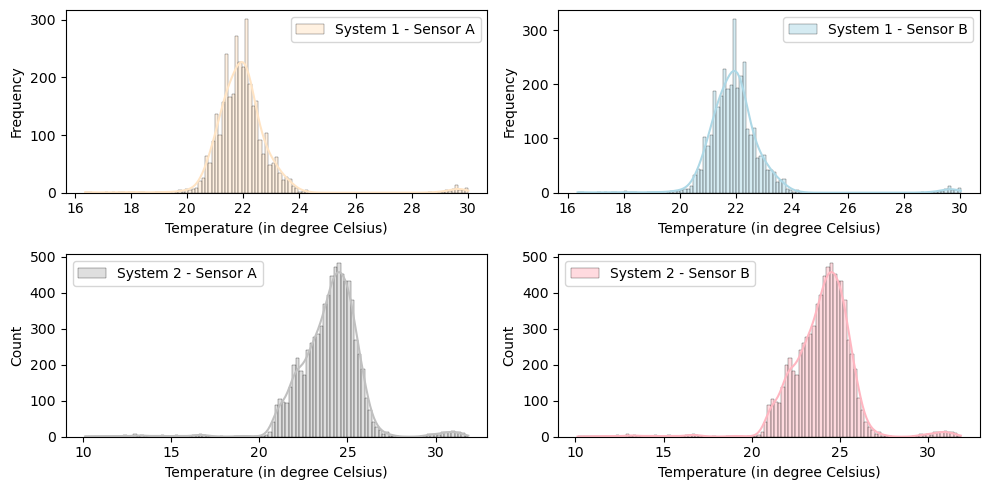

,System,Mean,Median
0,System 1A,22.001116,21.90270
1,System 1B,22.003559,21.90270
2,System 2A,23.963248,24.15850
3,System 2B,23.962490,24.15845


In [27]:
# Boxplots
boxplot_ambientTemperature = box_plot_time(variable4, 
                                           A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features,
                                           title_input6, colors_input, xlabel_input3, labels_input1)
boxplot_ambientTemperature

# Histograms
histogram_AmbientTemperature = histogram_time(variable4, 
                                              A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features,
                                              "", colors_input, xlabel_input3, labels_input1)
histogram_AmbientTemperature

# Mean and Median
calculate_stats(A1_Merged_Features, B1_Merged_Features, A2_Merged_Features, B2_Merged_Features, variable4)